In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
# Importing data
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/gdrive')

# Path to the CSV file in your Google Drive
csv_path = '/content/gdrive/MyDrive/advertising.csv'

# Reading the CSV file into a pandas dataframe
import pandas as pd
df = pd.read_csv(csv_path)


Mounted at /content/gdrive


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


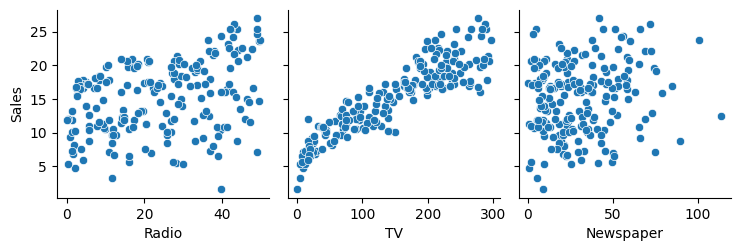

In [10]:
#Visualise the data
sns.pairplot(x_vars=['Radio','TV','Newspaper'],y_vars='Sales',data=df)

<Axes: >

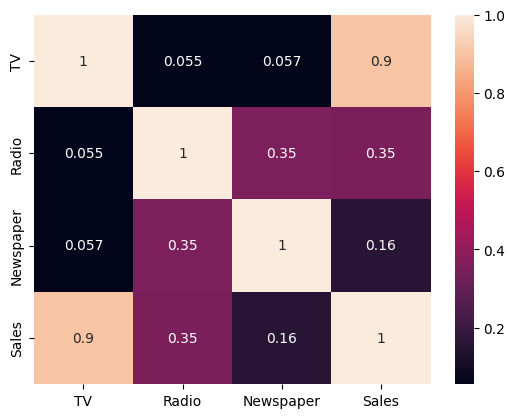

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
#Performing Simple linear regression model
import statsmodels
import statsmodels.api as sm
import sklearn


In [15]:
##Steps
#Create x and Y
# Create train and test set (train=70% and test=30%)
#train you model on the training set



In [17]:
from sklearn.model_selection import train_test_split
x=df['TV']
y=df['Sales']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=100)


In [23]:
#trainig the model
x_train_sm=sm.add_constant(x_train)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
#fitting the model
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        09:17:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

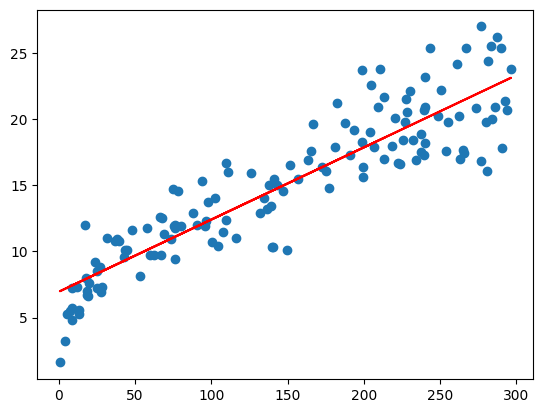

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,'r')
plt.show()

In [36]:
# Residual Analysis
#y_train, y_train_predct
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

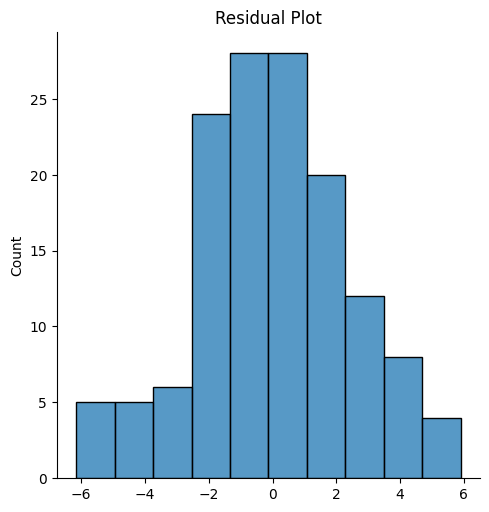

In [41]:
res = y_train - y_train_pred
plt.figure()
sns.displot(res)
plt.title("Residual Plot")

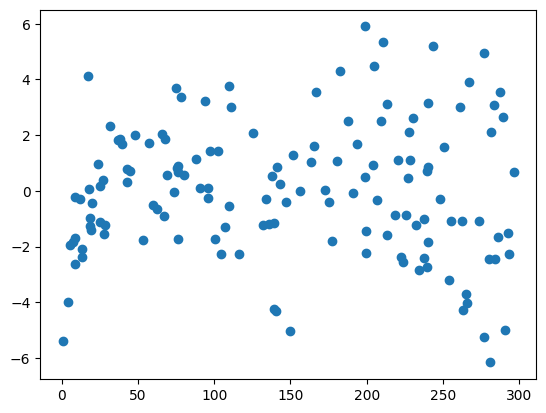

In [42]:
plt.scatter(x_train,res)

In [43]:
#prediction and evaluations on the test set
x_test_sm=sm.add_constant(x_test)
y_test_pred=lr_model.predict(x_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.792103160124566

In [62]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389

In [63]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred
                    )

4.077556371826953

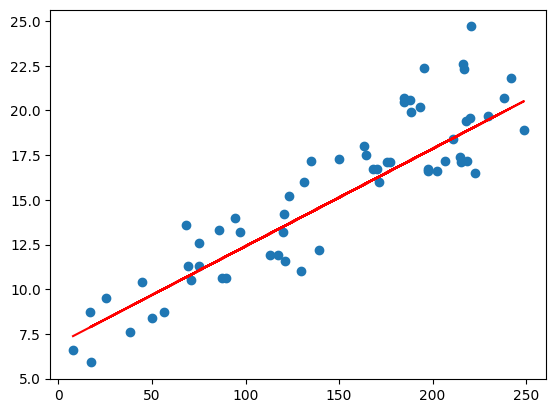

In [64]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')

In [67]:
## Linear Regression using Sklearn
from sklearn.linear_model import LinearRegression

In [69]:
#reshape x_train_lm to (n,-1)
x_train_lm=x_train.values.reshape(-1,1)
x_test_lm=x_test.values.reshape(-1,1)
x_train_lm.shape

(140, 1)

In [72]:
#create object on Liner Regression
lm=LinearRegression()

#fit the model 
lm.fit(x_train_lm,y_train) 

LinearRegression()

In [74]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [75]:
#making predications
y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)

In [77]:
#Evaluate the model
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2


0.7921031601245662

In [78]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389